In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import math
from sklearn.metrics import mean_squared_error

from config import MODEL_SAVE_PATH, MODEL_ARCHI_PLOT_PATH, MODEL_SHAPES_PLOT_PATH, \
                   PREDICTION_PLOT_PATH, THRESHOLD, TIMESTAMP, PREDICT_START, HORIZON, DATA_PATH


In [4]:
# Connectiing Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Loading the data
dataset = pd.read_csv(DATA_PATH, index_col='date', parse_dates=['date'])
dataset.head()

,Generation,Summarization,Embedding
date,,,
2020-01-01,8255,8081,8206
2020-01-02,8250,8133,8195
2020-01-03,8290,8100,8250
2020-01-04,8503,8341,8495
2020-01-05,8425,8338,8373


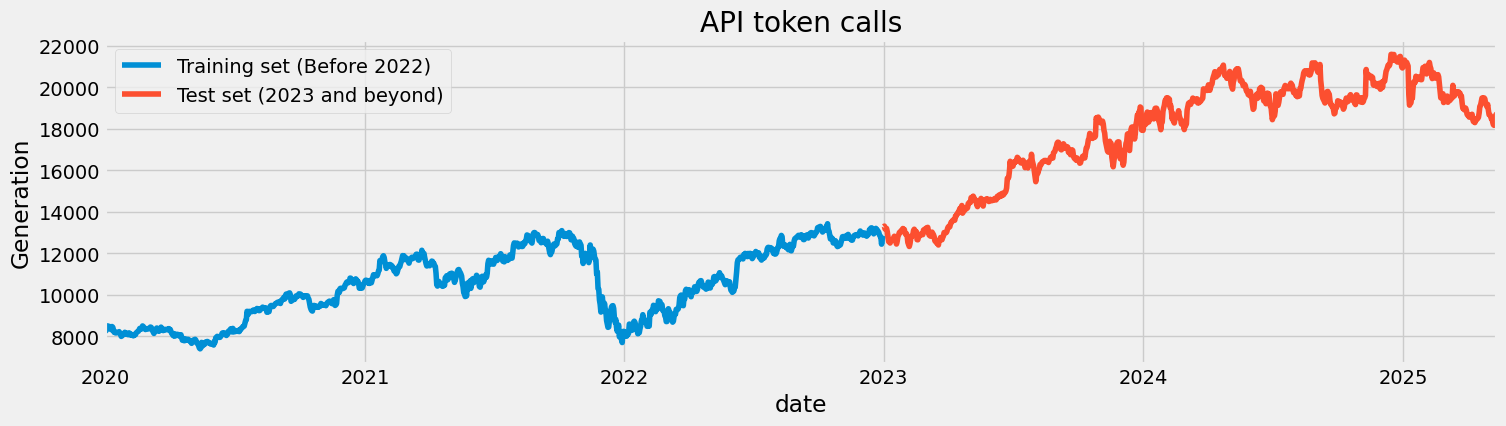

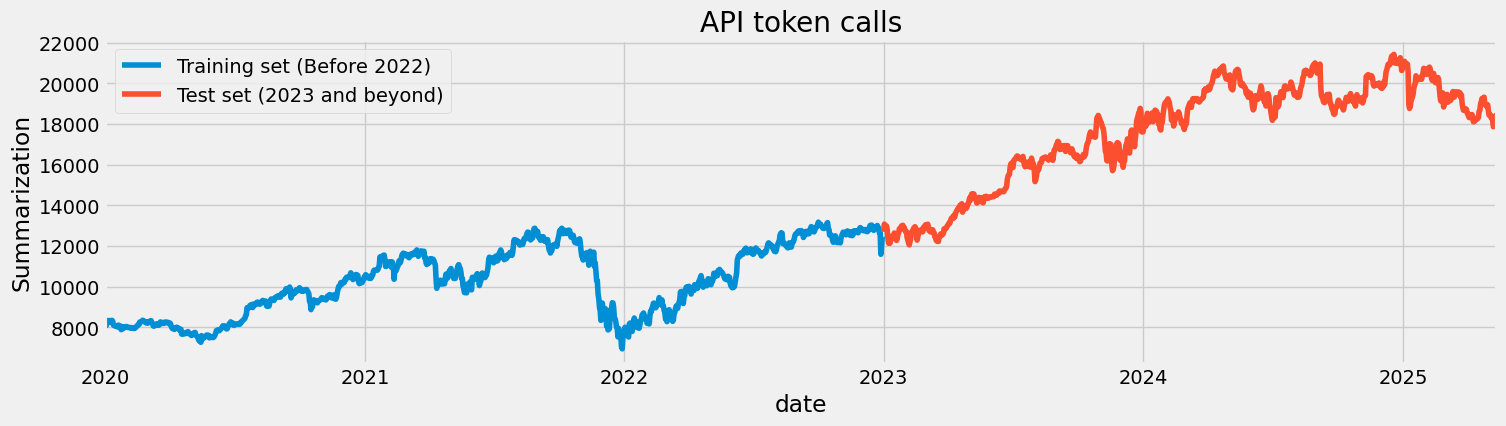

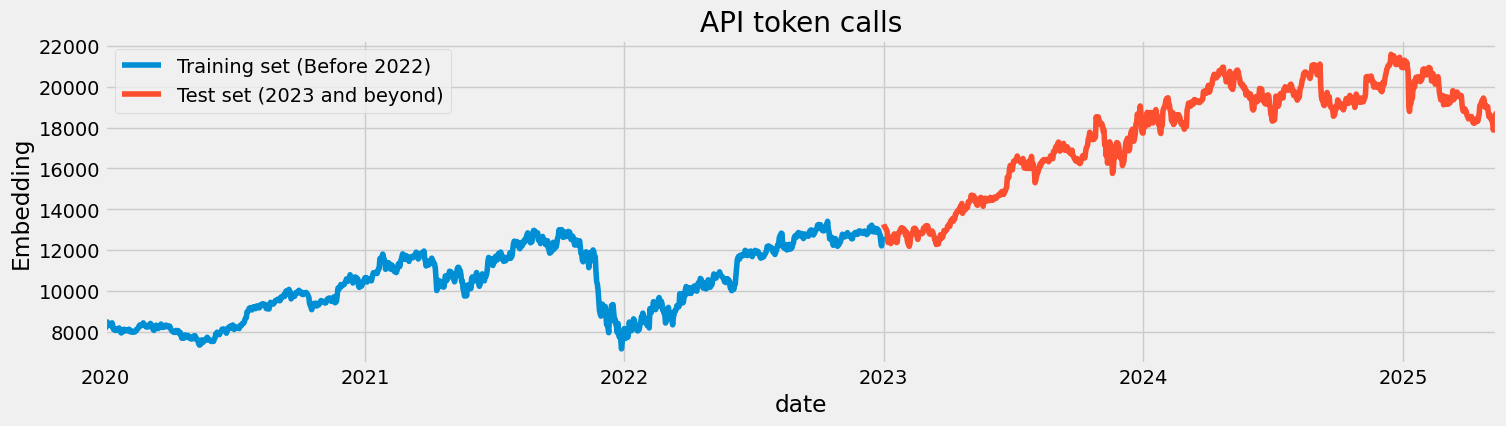

In [3]:
for col in list(dataset.columns):
    dataset[col][:'2022'].plot(figsize=(16,4),legend=True)
    dataset[col]['2023':].plot(figsize=(16,4),legend=True)
    plt.legend(['Training set (Before 2022)','Test set (2023 and beyond)'])
    plt.title('API token calls')
    plt.ylabel(col)
    plt.show()

### 모델 학습 진행 
### (20~23년도 학습된 모델 저장 코드)

In [12]:
def plot_predictions(test, predicted, col):
    plt.clf()  # 이전 그래프 초기화
    plt.plot(test, color='red', label='Real API Token Usage')
    plt.plot(predicted, color='blue', label='Predicted API Token Usages')
    plt.title('API Token Usage Prediction')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

============== Generation ==============


c:\Users\Administrator\Documents\skala-gai\mlops\mlops\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0668
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoc

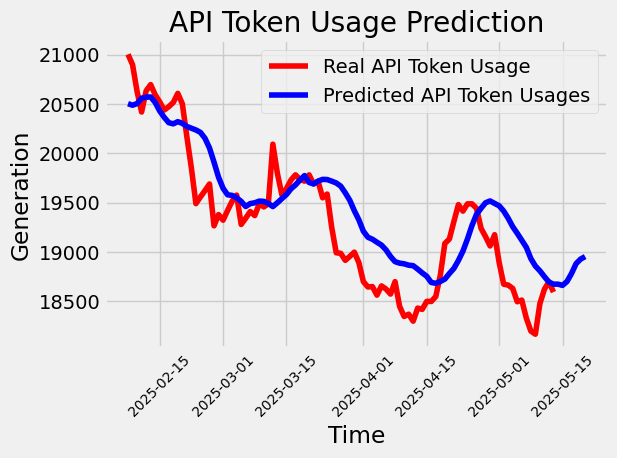

============== Summarization ==============


c:\Users\Administrator\Documents\skala-gai\mlops\mlops\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0630
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0028
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0025
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0020
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0021
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015
Epo

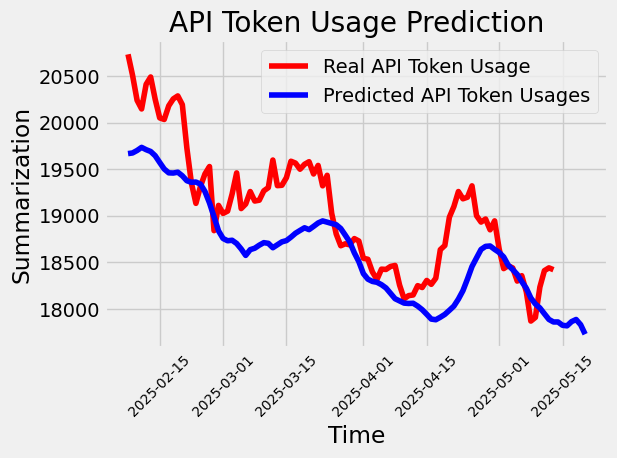

============== Embedding ==============


c:\Users\Administrator\Documents\skala-gai\mlops\mlops\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0550
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0016
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0018
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0019
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0015
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0028
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0018
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0018
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0022
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0018
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0018
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0015
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0020
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0017
Epo

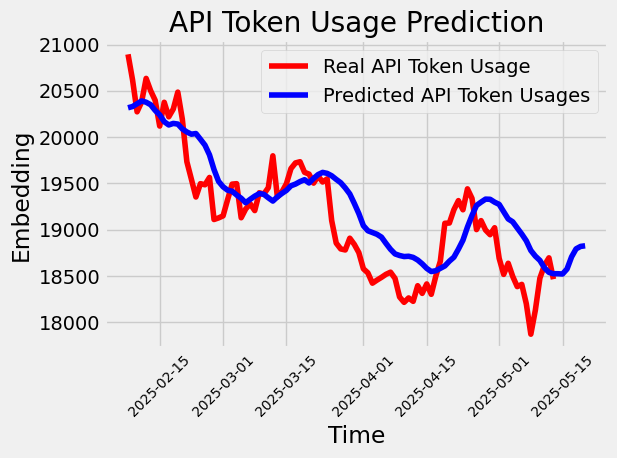

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

for col in list(dataset.columns):
    print(f'============== {col} ==============')

    training_set = pd.DataFrame(dataset[:'2023'][col]).values
    test_set = pd.DataFrame(dataset[PREDICT_START:][col]).values

    # 학습 데이터 전체 스케일링
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(training_set.reshape(-1, 1)).flatten()

    # 학습용 윈도우 생성
    X_train, y_train = [], []
    for i in range(len(train_scaled) - TIMESTAMP):
        X_train.append(train_scaled[i : i + TIMESTAMP])
        y_train.append(train_scaled[i + TIMESTAMP])
    X_train = np.array(X_train).reshape(-1, TIMESTAMP, 1)
    y_train = np.array(y_train)

    # 테스트 데이터 동일 스케일러로 변환
    test_scaled = scaler.transform(test_set.reshape(-1, 1)).flatten()

    # 모델 정의
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(TIMESTAMP, 1), activation='tanh'),
        Dropout(0.2),
        LSTM(64, return_sequences=True, activation='tanh'),
        LSTM(32, return_sequences=True, activation='tanh'),
        LSTM(16,  return_sequences=False, activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # 테스트용 윈도우 생성
    X_test= []
    for i in range(len(test_scaled) - TIMESTAMP):
        X_test.append(test_scaled[i : i + TIMESTAMP])
    X_test = np.array(X_test).reshape(-1, TIMESTAMP, 1)

    # 예측 & 역정규화
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
    y_pred = y_pred

    # rolling forcast
    last_window = X_test[-1]

    future_scaled = []

    x_input = last_window.reshape(-1, TIMESTAMP, 1) 
    for _ in range(HORIZON):
        next_scaled = model.predict(x_input)[0, 0]
        future_scaled.append(next_scaled)
        new_window = np.concatenate([x_input[0, 1:, :], [[next_scaled]]], axis=0)
        x_input = new_window.reshape(1, TIMESTAMP, 1)

    future_scaled = np.array(future_scaled).reshape(-1, 1)
    future = scaler.inverse_transform(future_scaled).flatten()
    recent_forcast = scaler.inverse_transform(future_scaled).flatten()[0]

    # visualization
    start_date = dataset[PREDICT_START:].index[TIMESTAMP] 
    end_date = dataset.index[-1] + pd.Timedelta(days=HORIZON)
    future_index = pd.date_range(start=start_date, end=end_date, freq='D', name='date')
        
    y_all = pd.Series(np.concatenate([y_pred, future]), index=future_index)

    result_visualizing = plot_predictions(dataset[start_date:][col], y_all, col)
        
    # 모델 저장
    model.save(MODEL_SAVE_PATH[col])


### server_model 내 코드 디버깅

In [34]:
from keras.models import load_model # type: ignore

In [38]:
# RMSE 계산 함수
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    result_msg = f"The root mean squared error is {rmse}."
    print(result_msg)
    return rmse

# 예측 결과 그래프 저장 함수
def plot_predictions(test, predicted, col):
    plt.clf()  # 이전 그래프 초기화
    plt.plot(test, color='red', label='Real API Token Usage')
    plt.plot(predicted, color='blue', label='Predicted API Token Usages')
    plt.title('API Token Usage Prediction')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend()
    plt.tight_layout() 
    plt.savefig(PREDICTION_PLOT_PATH[col])
    return PREDICTION_PLOT_PATH[col]


# 전처리 및 예측 진행 함수 + 임계치 달성 확인
def process_(dataset, col, threshold, timestamp=TIMESTAMP, scaler=False):
    model = load_model(MODEL_SAVE_PATH[col])

    if scaler is False:
        training_set = pd.DataFrame(dataset[:'2023'][col]).values
        scaler = MinMaxScaler(feature_range=(0, 1))
        _ = scaler.fit_transform(training_set.reshape(-1, 1)).flatten()

    test_set = pd.DataFrame(dataset[PREDICT_START:][col]).values
    test_scaled = scaler.transform(test_set.reshape(-1, 1)).flatten()

    # 테스트용 윈도우 생성
    X_test = []
    for i in range(len(test_scaled) - TIMESTAMP):
        X_test.append(test_scaled[i : i + TIMESTAMP])

    X_test = np.array(X_test).reshape(-1, TIMESTAMP, 1)

    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled).flatten()

    # rmse 확인
    result_rmse = return_rmse(test_set[TIMESTAMP:], y_pred)

    if result_rmse > threshold: # 재학습
        #retrain(dataset, col=col)
        return retrain_new(dataset, col=col)
    else:
        # rolling forcast
        last_window = X_test[-1]

        future_scaled = []

        x_input = last_window.reshape(-1, TIMESTAMP, 1) 
        for _ in range(HORIZON):
            next_scaled = model.predict(x_input)[0, 0]
            future_scaled.append(next_scaled)
            new_window = np.concatenate([x_input[0, 1:, :], [[next_scaled]]], axis=0)
            x_input = new_window.reshape(1, TIMESTAMP, 1)

        future_scaled = np.array(future_scaled).reshape(-1, 1)
        future = scaler.inverse_transform(future_scaled).flatten()
        recent_forcast = scaler.inverse_transform(future_scaled).flatten()[0]

        # visualization
        start_date = dataset[PREDICT_START:].index[TIMESTAMP] 
        end_date = dataset.index[-1] + pd.Timedelta(days=HORIZON)
        future_index = pd.date_range(start=start_date, end=end_date, freq='D', name='date')
        
        y_all = pd.Series(np.concatenate([y_pred, future]), index=future_index)

        result_visualizing = plot_predictions(dataset[start_date:][col], y_all, col)
        
        return result_rmse, result_visualizing, y_all, recent_forcast

# 모델 재학습 함수
def retrain(dataset, col, timestamp=TIMESTAMP, scaler=False):

    training_set = pd.DataFrame(dataset['2024-01-01':'2024-12-31'][col]).values

    # 학습 데이터 전체 스케일링
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(training_set.reshape(-1, 1)).flatten()

    X_train, y_train = [], []
    for i in range(len(train_scaled) - TIMESTAMP):
        X_train.append(train_scaled[i : i + TIMESTAMP])
        y_train.append(train_scaled[i + TIMESTAMP])

    X_train = np.array(X_train).reshape(-1, TIMESTAMP, 1)
    y_train = np.array(y_train)

    # 모델 로드 후 재학습
    model = load_model(MODEL_SAVE_PATH[col])
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # 모델 다시 저장
    model.save(MODEL_SAVE_PATH[col])
    return process_(dataset, col=col, threshold=THRESHOLD[col], scaler=scaler)


# 모델 재학습(아예 가중치 모두 다시 학습) 함수
def retrain_new(dataset, col, timestamp=TIMESTAMP):

    training_set = pd.DataFrame(dataset['2024-01-01':'2024-12-31'][col]).values

    # 학습 데이터 전체 스케일링
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(training_set.reshape(-1, 1)).flatten()

    X_train, y_train = [], []
    for i in range(len(train_scaled) - TIMESTAMP):
        X_train.append(train_scaled[i : i + TIMESTAMP])
        y_train.append(train_scaled[i + TIMESTAMP])

    X_train = np.array(X_train).reshape(-1, TIMESTAMP, 1)
    y_train = np.array(y_train)

    # 모델 아예 재학습
    from keras.models import Sequential # type: ignore
    from keras.layers import Dense, LSTM, Dropout # type: ignore

    model = Sequential([
                LSTM(128, return_sequences=True, input_shape=(TIMESTAMP, 1), activation='tanh'),
                Dropout(0.2),
                LSTM(64, return_sequences=True, activation='tanh'),
                LSTM(32, return_sequences=True, activation='tanh'),
                LSTM(16,  return_sequences=False, activation='tanh'),
                Dense(1)
             ])
    model.compile(optimizer='rmsprop', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # 모델 다시 저장
    model.save(MODEL_SAVE_PATH[col])

    return process_(dataset, col=col, threshold=THRESHOLD[col], scaler=scaler)


# 진행 함수 
def process(dataset):
    cols = list(dataset.columns)
    
    return_dict = {}
    
    # overall 위한 처리
    predicts = []
    return_dict['token_count'] = 0
    for col in cols:
        print(f"====== {col} ======")
        _, graph_LSTM, predict_value, next_time_pred = process_(dataset, col, threshold=THRESHOLD[col])
        key = f"{col.lower()}_graph"
        return_dict[key] = graph_LSTM
        
        predicts.append(predict_value)
        return_dict['token_count'] += next_time_pred
    
    # overall - sum
    start_date = dataset[PREDICT_START:].index[TIMESTAMP] 
    end_date = dataset.index[-1] + pd.Timedelta(days=HORIZON)
    future_index = pd.date_range(start=start_date, end=end_date, freq='D', name='date')

    sum_predict = [sum(vals) for vals in zip(*predicts)]
    sum_predict = pd.Series(sum_predict, index=future_index)

    sum_real = dataset[start_date:][cols].sum(axis=1)
    return_dict['overall_graph'] = plot_predictions(sum_real, sum_predict, col='All token')
    
    return return_dict

====== Generation ======
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step
The root mean squared error is 395.20372515324294.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
====== Summarization ======
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step
The root mean squared error is 520.1722671384932.
Epoch 1/50


c:\Users\Administrator\Documents\skala-gai\mlops\mlops\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.2038
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0211
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0139
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174
Epoch 16/50
12/

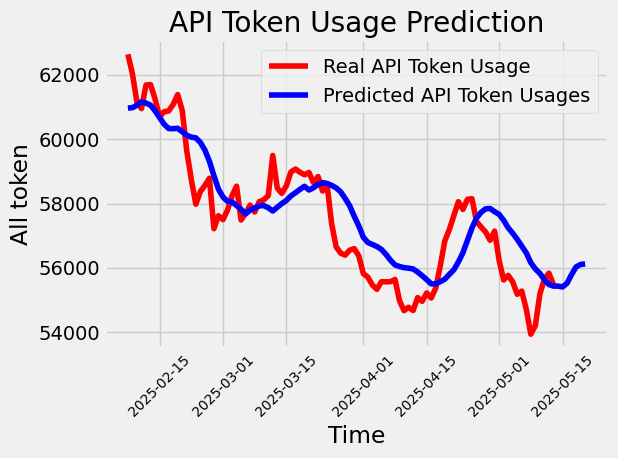

In [39]:
result_dict = process(dataset)

In [40]:
result_dict

{'token_count': np.float32(55435.562),
 'generation_graph': '..\\server\\model\\result\\generation_API_calls.png',
 'summarization_graph': '..\\server\\model\\result\\summarization_API_calls.png',
 'embedding_graph': '..\\server\\model\\result\\embedding_API_calls.png',
 'overall_graph': '..\\server\\model\\result\\AllToken_API_calls.png'}

In [13]:
# 3. 모델 아키텍처 보기
from keras.utils import plot_model
import pydot
import graphviz

plot_model(model, to_file=MODEL_ARCHI_PLOT_PATH)
plot_model(model, to_file=MODEL_SHAPES_PLOT_PATH, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
